# 0.0.Entendimento do projeto

**Objetivo do projeto, como ele sera resolvido e muitas outras informações contidas no arquivo PDS(Plano de Solução).**


**OBS:** Assim como fiz para separar as 5 primeiras etapas com as etapas de machine learning, farei o mesmo aqui, para não ter que ficar rodando todos os modelos, eu já salvei o melhor modelo e vou salvar dados selecionados.

# 1.0.Impots

In [1]:
#Manipulação de dados
import pandas as pd
import numpy as np
import sys , os
import joblib

#Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning Models
from sklearn.model_selection import train_test_split

#filterwarnings
import warnings
warnings.filterwarnings('ignore')

#Show all columns
pd.set_option('display.max_columns', None)

## 1.1.Load Data and Model

In [2]:
dados = pd.read_csv('datasets/dados_selecionados.csv').drop('Unnamed: 0',axis=1)
modelo_random_forest = joblib.load('modelo/custumer_churn_random_forest_class.joblib')

## 1.2.Funções de ajuda

In [3]:
sys.path.append(os.path.abspath(os.path.join('modulos')))

#Avaliar perfomance
from models_performance import model_perfomance_class

## 1.3.Previsoes com o modelo

In [4]:
X = dados.drop('exited',axis=1)
y = dados['exited']

In [5]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Previsões erradas sobre o Total
450 / 3605


Accuracy: 87.52%
Balacend Acurracy: 86.82%
Kappa Score: 74.21%
AUC: 0.8682

               precision    recall  f1-score   support

           0       0.88      0.91      0.89      2085
           1       0.87      0.82      0.85      1520

    accuracy                           0.88      3605
   macro avg       0.87      0.87      0.87      3605
weighted avg       0.88      0.88      0.87      3605



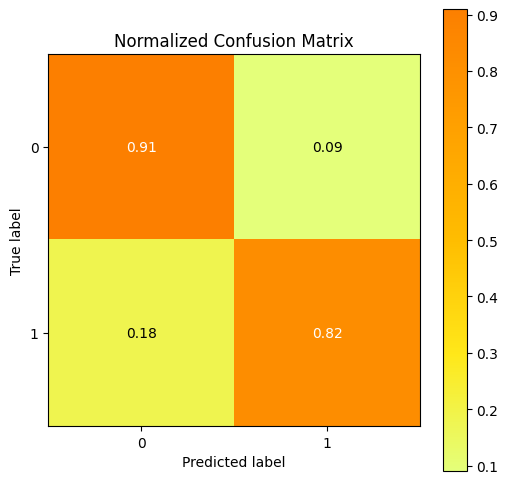

In [6]:
#Resultados
results = modelo_random_forest.predict(X_test)
model_perfomance_class(y_test,results,show=True)

# 2.0.Interpretação do erro

**Resultado:** Como os dados não possuem uma variável que representa o quanto o cliente vale para a empresa, fica inviável fazer analises mais aprofundadas do erro, pois nesses casos de classificação a comparação do erro e mais vinha gráfico mesmo, por isso vou me reter a apenas plotar um gráfico comparando o valor real vs previsto.

In [7]:
df_test = X_test.copy()

In [13]:
df_test['exited_true'] = y_test
df_test['exited_predict'] = results
df_test.head(3)

,credit_score,Balance,num_of_products,isActiveMember,estimated_salary,age_cat,exited_true,exited_predict
10333,-0.010423,-0.798963,1.703692,-0.279295,0.562914,0.4015,1,1
4532,0.195204,-0.010332,0.000000,0.720705,-0.223927,0.4015,0,0
9931,-0.064154,0.157581,0.424214,-0.279295,0.040877,0.4015,1,1


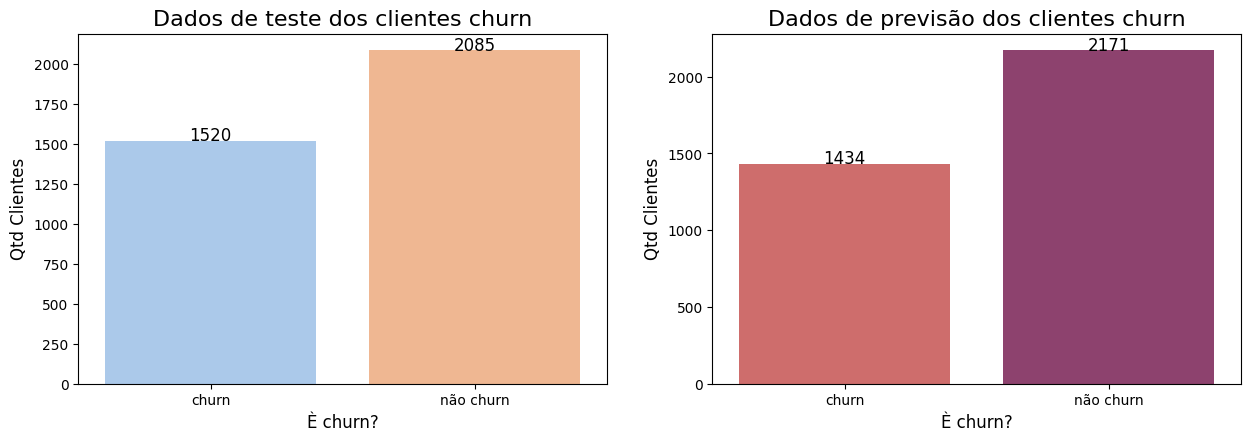

In [44]:
#Valor verdadeiro
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
fig = sns.countplot(df_test['exited_true'].map(lambda x: 'churn' if x == 1 else 'não churn'),palette='pastel')
plt.title('Dados de teste dos clientes churn',fontsize=16,color='black')
plt.xlabel('È churn?',fontsize=12,color='black')
plt.ylabel('Qtd Clientes',fontsize=12,color='black')
for p in fig.patches: #Data label, numeros em cima do grafico.
        fig.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)



#Valor previsto
plt.subplot(2,2,2)
fig_ = sns.countplot(df_test['exited_predict'].map(lambda x: 'churn' if x == 1 else 'não churn'),palette='flare')
plt.title('Dados de previsão dos clientes churn',fontsize=16,color='black')
plt.xlabel('È churn?',fontsize=12,color='black')
plt.ylabel('Qtd Clientes', fontsize=12,color='black')
for p in fig_.patches: #Data label, numeros em cima do grafico.
        fig_.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)

plt.show()

In [54]:
#Confirmando o valor nos graficos
df_test['exited_true'].value_counts()

0    2085
1    1520
Name: exited_true, dtype: int64

In [55]:
df_test['exited_predict'].value_counts()

0    2171
1    1434
Name: exited_predict, dtype: int64

**O que foi feito nessa etapa?**
- Interpretação do erro:
    - Como já comentei na etapa anterior, a falta de uma feature de quanto o cliente vale para a empresa impende que eu faça uma análise de quanto a empresa vai ganhar ou perder caso siga minha solução.

    - Por isso fiquei apenas nos gráficos de comparação entre o real e o previsto, claro que já poderíamos observar o quanto o modelo erra com a minha função de performance mais é bom deixar uma etapa para refletir o que a falta de dados faz em uma
análise que poderia ser mais aprofundada.
    
**O que será feito na próxima etapa?**
- Deploy do modelo e finalização:
    - Como já explicado no arquivo PDS, o meu objetivo de criar um modelo com uma performance acima de 80% foi concluído, agora na próxima etapa eu criarei a class de deploy do modelo, como dito no pds o deploy não será feito o objetivo e criar a classe mesmo: ela possibilita o deploy do modelo em outro momento.
    - Finalização do projeto será feita, também, conclusão e ultimas considerações.

**Próxima etapa:**
Deploy do modelo e finalização